In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\megam\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df = df[df["koi_disposition"] != 'CANDIDATE']
df["koi_disposition"].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
Name: koi_disposition, dtype: int64

# Select your features (columns)

In [17]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']]
selected_features.koi_period.astype(float)

0       54.418383
1       19.899140
2        1.736952
3        2.525592
4        4.134435
          ...    
6983    21.513523
6986     8.589871
6987     0.527699
6989     0.681402
6990     4.856035
Name: koi_period, Length: 5304, dtype: float64

# Create a Train Test Split

Use `koi_disposition` for the y values

In [18]:
df['koi_disposition_dummy'] = df.koi_disposition.map({'FALSE POSITIVE':0, 'CONFIRMED':1})
y = df['koi_disposition_dummy']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=0)

In [20]:
X_train.shape

(3978, 10)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# # Scale your data
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# X_scaler = minmax.fit_transform(X_train)

# Train the Model



In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(0)

In [153]:
# Creating a random forest classifier
model2 = RandomForestClassifier(n_jobs=2, random_state=0)
# Training classifier
model2.fit(X_train, y_train)

C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [154]:
preds = model2.predict(X_test)

In [155]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,810,70
1,90,356


In [156]:
num_important = (model2.feature_importances_).astype(str)
features = X_test.columns

def myfunc(a, b):
    return [round(float(b)*100, 2)] + [a]


important_features_map = map(myfunc, features, num_important)
important_features = dict(important_features_map)
 
sorted_important_features = sorted(important_features.items(), reverse=True)

In [157]:
print(f"Training Data Score: {model2.score(X_train, y_train)}")
print(f"Testing Data Score: {model2.score(X_test, y_test)}")
print("-----------------------------------------------------")
print(f"Most important features:\n{sorted_important_features[:4]}")

Training Data Score: 0.9927099044746104
Testing Data Score: 0.8793363499245852
-----------------------------------------------------
Most important features:
[(22.06, 'koi_prad'), (13.89, 'koi_period'), (13.49, 'koi_insol'), (10.57, 'koi_depth')]


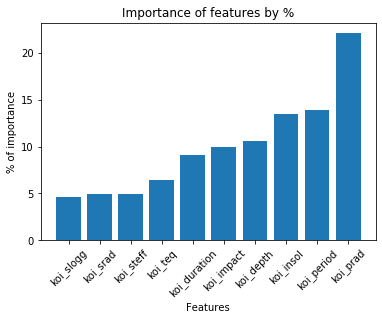

<Figure size 432x288 with 0 Axes>

In [160]:
from matplotlib import pyplot as plt

lists = sorted(important_features.items()) # sorted by key, return a list of tuples

y, x = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots()
ax.bar(x, y)

ax.set(xlabel='Features', ylabel='% of importance',
       title='Importance of features by %')

labels = x
plt.xticks(x, labels, rotation=45)

plt.show()

plt.savefig("important_features.png")


# Save the Model

In [89]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'megan_okerlund_model2.sav'
joblib.dump(model2, filename)

['megan_okerlund_model2.sav']